# LOD and AAM Correlation Analysis

**Scientific Posture:**

We are **not** trying to prove ECDO.

We are testing whether **Earth system observables show anomalous coupling inconsistent with known processes**.

---

## Null Hypothesis (H₀)

> After accounting for known atmospheric–oceanic angular momentum exchange and established oscillatory modes (seasonal cycle, ENSO-scale variability, Chandler wobble), variations in Earth rotation (LOD) and atmospheric angular momentum (AAM) follow expected physical coupling.

This notebook explores the correlation between:
- **LOD (Length of Day)** - variations in Earth's rotation rate
- **X3_atm** - Atmospheric excitation factor (Mass_Z + Motion_Z)

In [1]:
import sys
from pathlib import Path

# Add src to path for imports
sys.path.insert(0, str(Path.cwd().parent / 'src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from ecdo_analysis.data_loaders import load_lod_data, load_aam_data, load_combined_data

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

%matplotlib inline

## 1. Load Data

Load both LOD and AAM data, resampled to monthly intervals (month start).

In [2]:
# Load combined data (will use overlapping time range)
df = load_combined_data(
    lod_file='../data/EOP_14_C04_IAU2000A_one_file_1962-now.txt',
    aam_dir='../data',
    resample_freq='MS'  # Month start
)

print(f"Data range: {df.index.min()} to {df.index.max()}")
print(f"Total months: {len(df)}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()

/Users/tedslusser/PycharmProjects/ecdo-analysis/src/ecdo_analysis/data_loaders.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


Data range: 1976-01-01 00:00:00 to 2025-11-01 00:00:00
Total months: 599

Columns: ['LOD_ms', 'LOD', 'Mass_Z', 'Motion_Z', 'X3_atm']

First few rows:


,LOD_ms,LOD,Mass_Z,Motion_Z,X3_atm
datetime,,,,,
1976-01-01,2.790903,0.002791,-8.982050e-10,2.658579e-09,1.760374e-09
1976-02-01,2.882034,0.002882,-3.335458e-10,1.476658e-09,1.143112e-09
1976-03-01,3.234194,0.003234,-3.475410e-10,3.808721e-09,3.461180e-09
1976-04-01,3.316767,0.003317,8.467625e-11,5.248074e-09,5.332751e-09
1976-05-01,3.116226,0.003116,-1.118248e-10,6.061404e-09,5.949580e-09


In [3]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()

Missing values:
LOD_ms      0
LOD         0
Mass_Z      0
Motion_Z    0
X3_atm      0
dtype: int64

Basic statistics:


,LOD_ms,LOD,Mass_Z,Motion_Z,X3_atm
count,599.000000,599.000000,5.990000e+02,5.990000e+02,5.990000e+02
mean,1.243652,0.001244,2.429456e-11,6.976977e-10,7.219923e-10
std,0.948917,0.000949,4.027072e-10,4.394875e-09,4.166980e-09
min,-1.026106,-0.001026,-1.399538e-09,-1.114086e-08,-1.069905e-08
25%,0.540582,0.000541,-2.470313e-10,-2.779255e-09,-2.556542e-09
50%,1.179083,0.001179,3.806176e-11,1.859775e-09,1.653672e-09
75%,1.940090,0.001940,3.011338e-10,4.019393e-09,3.845382e-09
max,3.536857,0.003537,9.975722e-10,1.039144e-08,9.782018e-09


## 2. Initial Time Series Plots

Following Step 5 from the README: Only three plots initially:
1. Raw monthly LOD
2. Raw monthly atmospheric excitation (X3_atm)
3. (We'll add rolling correlation later)

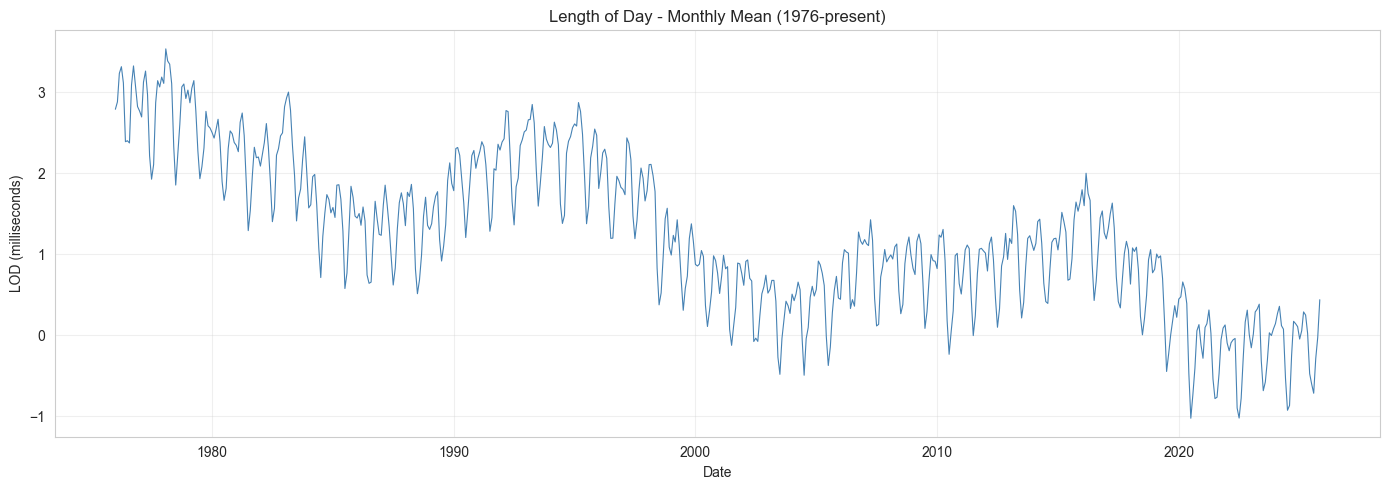

In [4]:
# Plot 1: Raw monthly LOD
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(df.index, df['LOD_ms'], linewidth=0.8, color='steelblue')
ax.set_xlabel('Date')
ax.set_ylabel('LOD (milliseconds)')
ax.set_title('Length of Day - Monthly Mean (1976-present)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

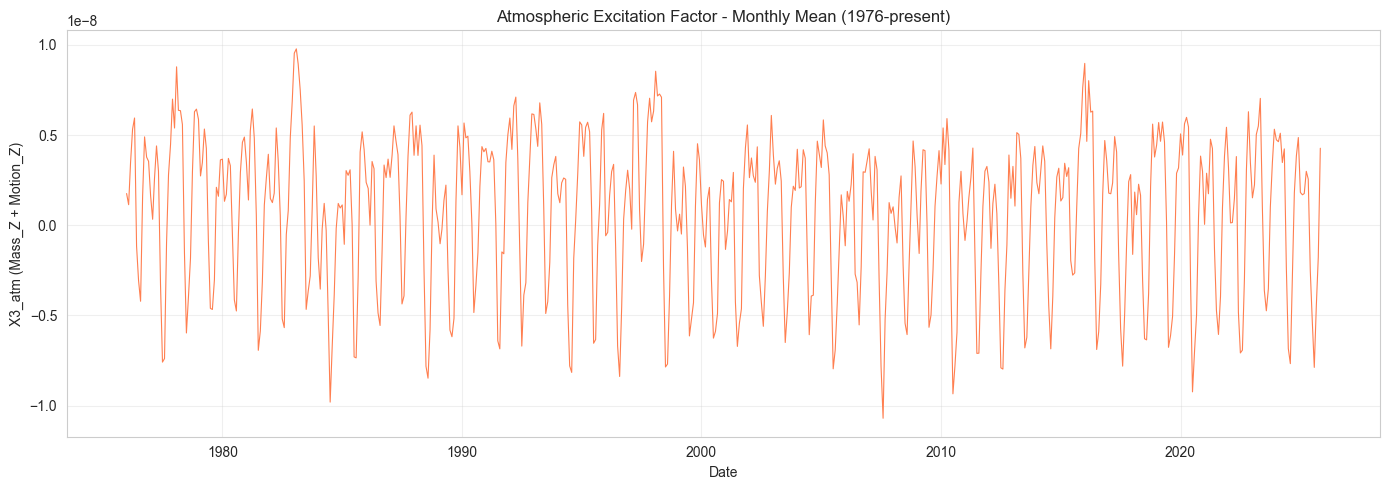

In [5]:
# Plot 2: Raw monthly X3_atm (atmospheric excitation)
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(df.index, df['X3_atm'], linewidth=0.8, color='coral')
ax.set_xlabel('Date')
ax.set_ylabel('X3_atm (Mass_Z + Motion_Z)')
ax.set_title('Atmospheric Excitation Factor - Monthly Mean (1976-present)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Correlation Analysis

### 3.1 Overall Correlation

Compute the correlation between LOD and X3_atm over the entire time series.

In [6]:
# Calculate Pearson correlation
corr_pearson, p_value_pearson = stats.pearsonr(df['LOD_ms'], df['X3_atm'])
print(f"Pearson correlation: {corr_pearson:.4f}")
print(f"P-value: {p_value_pearson:.4e}")

# Calculate Spearman correlation (rank-based, robust to outliers)
corr_spearman, p_value_spearman = stats.spearmanr(df['LOD_ms'], df['X3_atm'])
print(f"\nSpearman correlation: {corr_spearman:.4f}")
print(f"P-value: {p_value_spearman:.4e}")

Pearson correlation: 0.4809
P-value: 5.4262e-36

Spearman correlation: 0.4451
P-value: 1.7142e-30


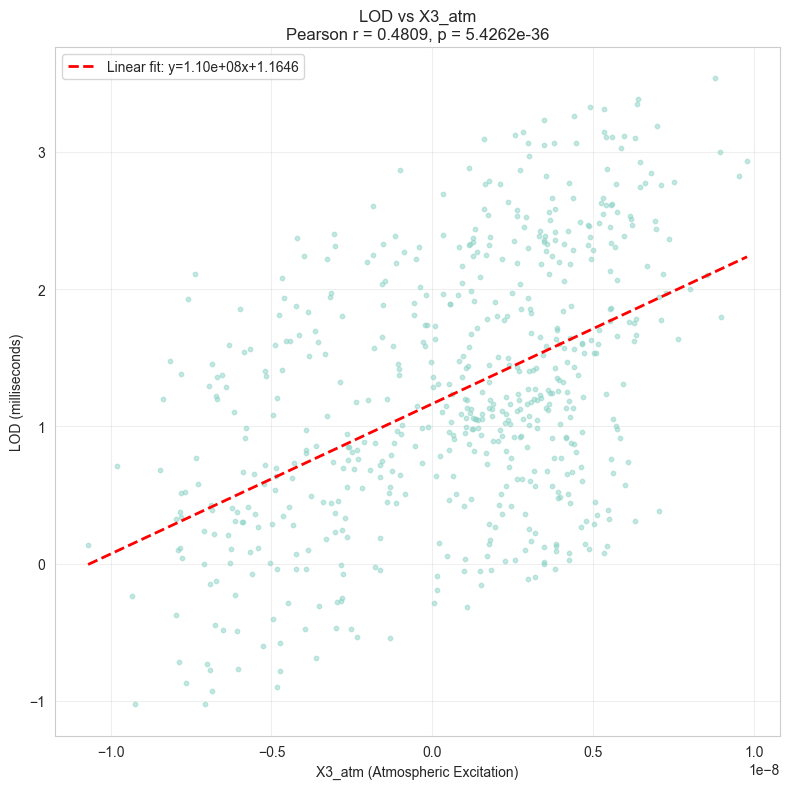

In [7]:
# Scatter plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df['X3_atm'], df['LOD_ms'], alpha=0.5, s=10)
ax.set_xlabel('X3_atm (Atmospheric Excitation)')
ax.set_ylabel('LOD (milliseconds)')
ax.set_title(f'LOD vs X3_atm\nPearson r = {corr_pearson:.4f}, p = {p_value_pearson:.4e}')
ax.grid(True, alpha=0.3)

# Add regression line
z = np.polyfit(df['X3_atm'], df['LOD_ms'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['X3_atm'].min(), df['X3_atm'].max(), 100)
ax.plot(x_line, p(x_line), 'r--', linewidth=2, label=f'Linear fit: y={z[0]:.2e}x+{z[1]:.4f}')
ax.legend()

plt.tight_layout()
plt.show()

### 3.2 Rolling Window Correlation

Plot 3: Rolling correlation to test for temporal stability.

From Step 2 of the README: We need to check if correlation **persists across decades** and **survives rolling-window analysis**.

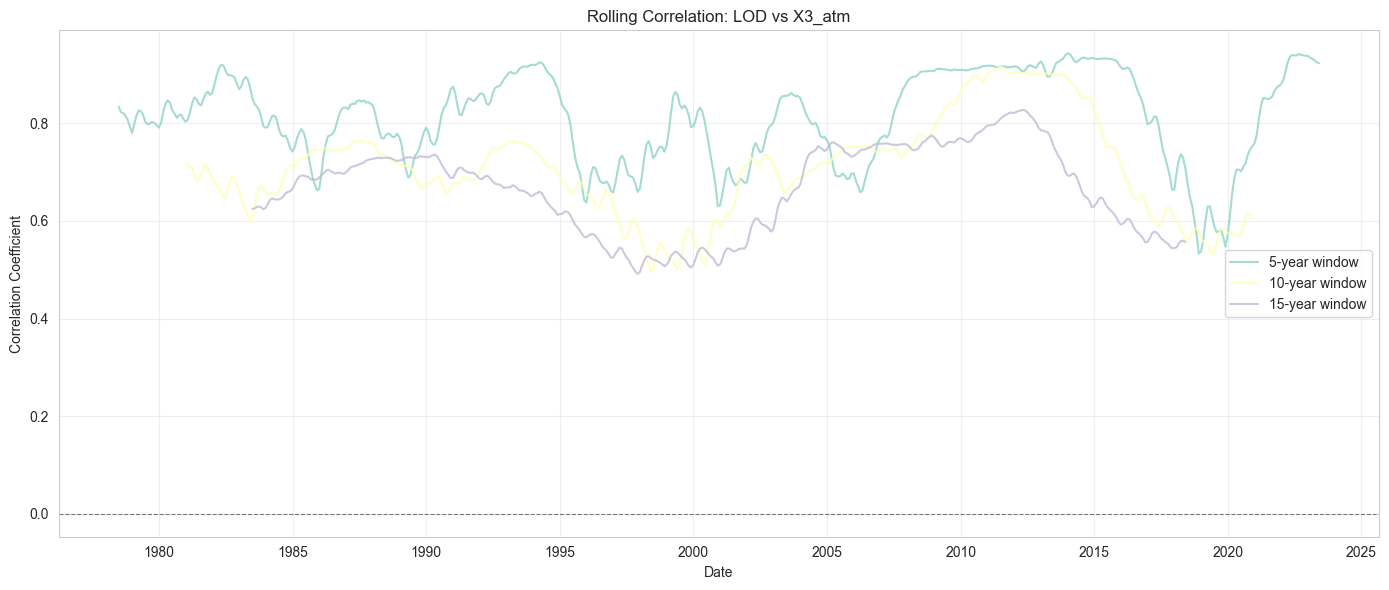

In [8]:
# Calculate rolling correlation with different window sizes
window_years = [5, 10, 15]  # Years

fig, ax = plt.subplots(figsize=(14, 6))

for window in window_years:
    # Convert years to number of months
    window_months = window * 12
    
    # Calculate rolling correlation
    rolling_corr = df['LOD_ms'].rolling(window=window_months, center=True).corr(df['X3_atm'])
    
    ax.plot(df.index, rolling_corr, linewidth=1.5, label=f'{window}-year window', alpha=0.8)

ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Rolling Correlation: LOD vs X3_atm')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 3.3 Deseasonalize and Re-correlate

Remove seasonal cycle to test if correlation persists beyond seasonal effects.

In [9]:
# Remove seasonal cycle (monthly means)
df['LOD_deseasoned'] = df.groupby(df.index.month)['LOD_ms'].transform(lambda x: x - x.mean())
df['X3_atm_deseasoned'] = df.groupby(df.index.month)['X3_atm'].transform(lambda x: x - x.mean())

# Calculate correlation on deseasonalized data
corr_deseasoned, p_value_deseasoned = stats.pearsonr(df['LOD_deseasoned'], df['X3_atm_deseasoned'])
print(f"Deseasonalized Pearson correlation: {corr_deseasoned:.4f}")
print(f"P-value: {p_value_deseasoned:.4e}")

Deseasonalized Pearson correlation: 0.3814
P-value: 3.5308e-22


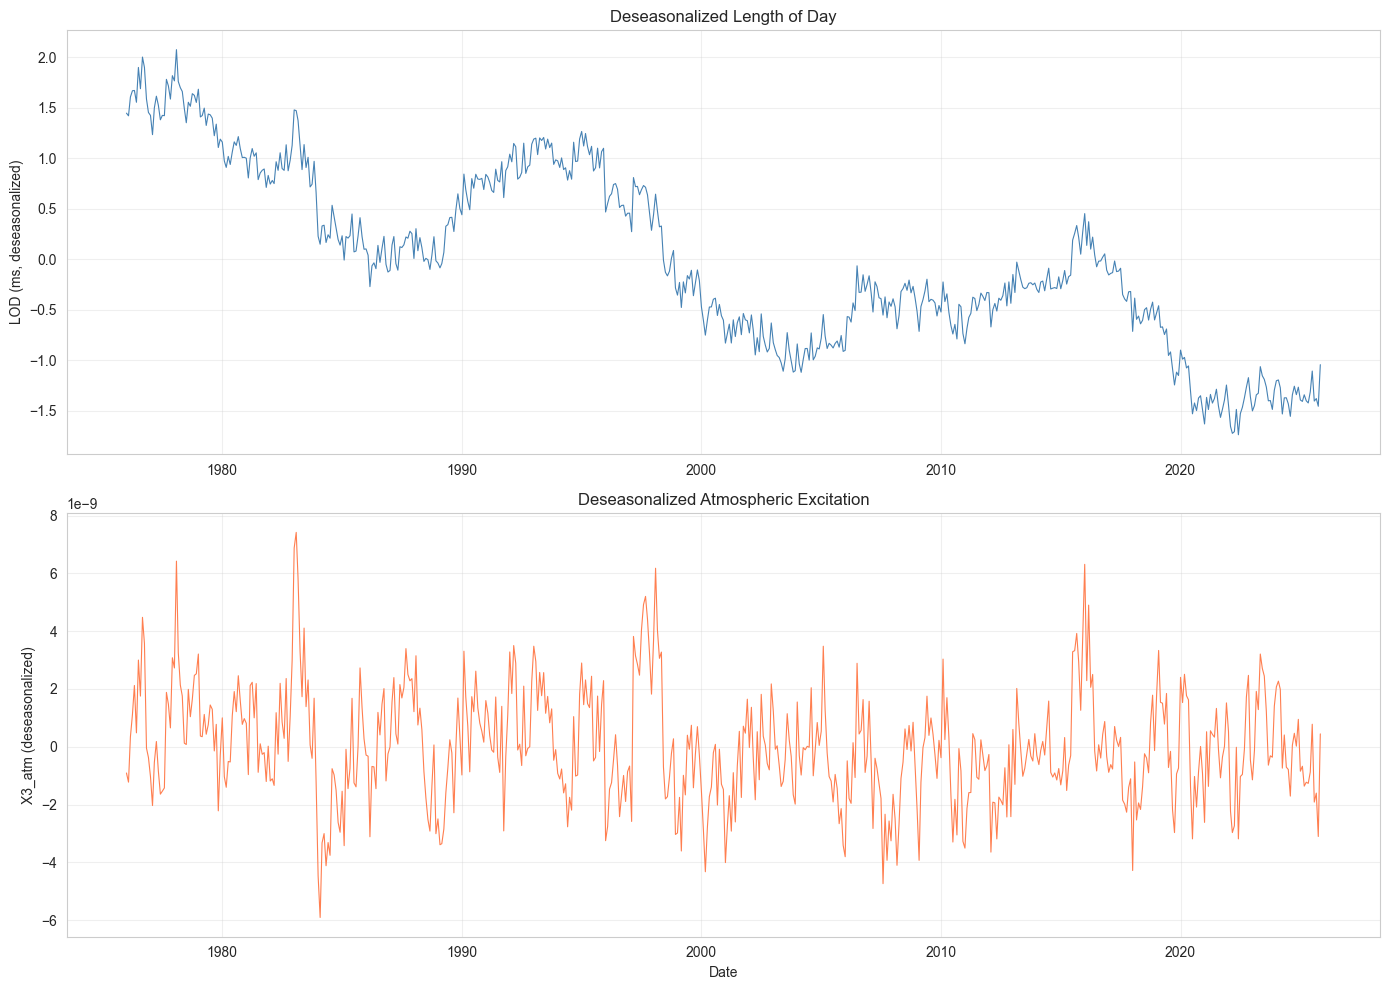

In [10]:
# Plot deseasonalized time series
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

axes[0].plot(df.index, df['LOD_deseasoned'], linewidth=0.8, color='steelblue')
axes[0].set_ylabel('LOD (ms, deseasonalized)')
axes[0].set_title('Deseasonalized Length of Day')
axes[0].grid(True, alpha=0.3)

axes[1].plot(df.index, df['X3_atm_deseasoned'], linewidth=0.8, color='coral')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('X3_atm (deseasonalized)')
axes[1].set_title('Deseasonalized Atmospheric Excitation')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Subset Analysis: Pre-2000 vs Post-2000

From Step 2: Test for **out-of-sample robustness** - does the relationship appear pre-2000 as well as post-2000?

In [11]:
# Split data
df_pre2000 = df[df.index < '2000-01-01']
df_post2000 = df[df.index >= '2000-01-01']

# Pre-2000 correlation
corr_pre, p_pre = stats.pearsonr(df_pre2000['LOD_ms'], df_pre2000['X3_atm'])
print(f"Pre-2000 correlation: {corr_pre:.4f} (p={p_pre:.4e}, n={len(df_pre2000)})")

# Post-2000 correlation
corr_post, p_post = stats.pearsonr(df_post2000['LOD_ms'], df_post2000['X3_atm'])
print(f"Post-2000 correlation: {corr_post:.4f} (p={p_post:.4e}, n={len(df_post2000)})")

Pre-2000 correlation: 0.6364 (p=4.2574e-34, n=288)
Post-2000 correlation: 0.5933 (p=5.8584e-31, n=311)


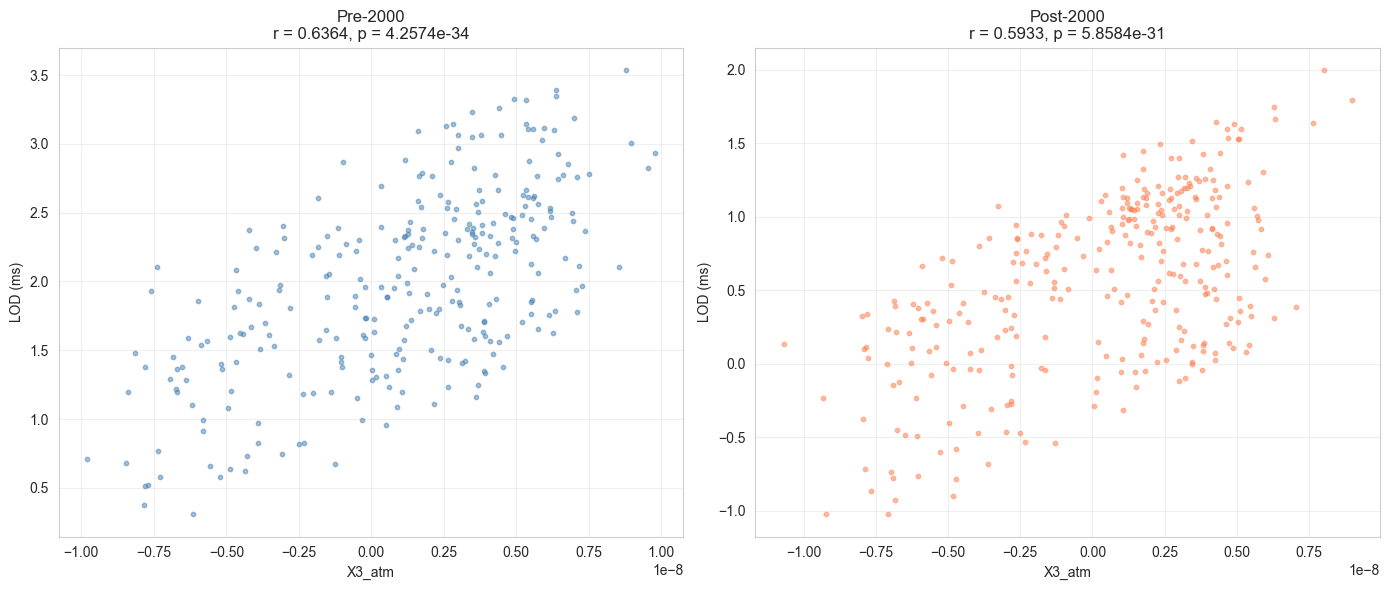

In [12]:
# Side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pre-2000
axes[0].scatter(df_pre2000['X3_atm'], df_pre2000['LOD_ms'], alpha=0.5, s=10, color='steelblue')
axes[0].set_xlabel('X3_atm')
axes[0].set_ylabel('LOD (ms)')
axes[0].set_title(f'Pre-2000\nr = {corr_pre:.4f}, p = {p_pre:.4e}')
axes[0].grid(True, alpha=0.3)

# Post-2000
axes[1].scatter(df_post2000['X3_atm'], df_post2000['LOD_ms'], alpha=0.5, s=10, color='coral')
axes[1].set_xlabel('X3_atm')
axes[1].set_ylabel('LOD (ms)')
axes[1].set_title(f'Post-2000\nr = {corr_post:.4f}, p = {p_post:.4e}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Summary Statistics

Collect all correlation coefficients for review.

In [13]:
summary = pd.DataFrame({
    'Analysis': [
        'Overall (Pearson)',
        'Overall (Spearman)',
        'Deseasonalized',
        'Pre-2000',
        'Post-2000'
    ],
    'Correlation': [
        corr_pearson,
        corr_spearman,
        corr_deseasoned,
        corr_pre,
        corr_post
    ],
    'P-value': [
        p_value_pearson,
        p_value_spearman,
        p_value_deseasoned,
        p_pre,
        p_post
    ],
    'N': [
        len(df),
        len(df),
        len(df),
        len(df_pre2000),
        len(df_post2000)
    ]
})

print("\n=== Correlation Summary ===")
print(summary.to_string(index=False))


=== Correlation Summary ===
          Analysis  Correlation      P-value   N
 Overall (Pearson)     0.480895 5.426242e-36 599
Overall (Spearman)     0.445141 1.714204e-30 599
    Deseasonalized     0.381413 3.530839e-22 599
          Pre-2000     0.636353 4.257413e-34 288
         Post-2000     0.593307 5.858434e-31 311


## Next Steps

Based on these initial correlations:

1. **If correlation is strong and expected**: This validates known AAM-LOD coupling
2. **If correlation is weak or non-stationary**: Further investigation needed
3. **Future analyses**:
   - Control for AAM in seismic moment analysis (Step 2, criterion 2)
   - Test different smoothing parameters
   - Add ENSO proxy as additional control